In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
import json
messy = json.load(open('ultimate_data_challenge.json'))
df = pd.DataFrame(messy)

In [110]:
#I don't really get why this doesn't work
#pd.read_json('ultimate_data_challenge.json')

In [111]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [112]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [114]:
df.loc[:,'last_trip_date'] = pd.to_datetime(df.loc[:,'last_trip_date'])
df.loc[:,'signup_date'] = pd.to_datetime(df.loc[:,'signup_date'])

We have nulls in the phone and rating fields.  Lets investigate.

In [115]:
df[df.phone.isnull()].head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
134,2.88,5.0,5.0,1.00,King's Landing,2014-06-11,None,2014-01-10,0.0,0,False,100.0
176,20.32,5.0,5.0,1.00,Astapor,2014-03-18,None,2014-01-28,0.0,0,False,100.0
320,31.01,5.0,5.0,1.00,Astapor,2014-01-09,None,2014-01-08,0.0,1,False,100.0
349,6.03,5.0,3.3,1.00,Winterfell,2014-06-22,None,2014-01-06,0.0,1,True,33.3
389,3.08,4.8,4.9,1.02,King's Landing,2014-07-01,None,2014-01-26,3.0,5,False,66.7


In [116]:
df.groupby('phone').count()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
phone,,,,,,,,,,,
Android,15022,14960,12134,15022,15022,15022,15022,15022,15022,15022,15022
iPhone,34582,34446,29444,34582,34582,34582,34582,34582,34582,34582,34582


It seems highly unlikely that user with none values don't have phones at all else how would they call an Ultimate.  Since the only two options are iPhone or Android its most likely that these users phones aren't iPhone's or Android and it would be more accurate to give them their own category: other.

In [117]:
df.loc[df.phone.isnull(),'phone'] = 'Other'

In [118]:
df.groupby('phone').mean()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
phone,,,,,,,,
Android,5.978743,4.784144,4.627394,1.071718,8.540401,1.934962,0.320996,60.403202
Other,7.225859,4.815522,4.614333,1.046338,5.620455,2.396465,0.611111,66.218687
iPhone,5.701441,4.775132,4.590783,1.076412,9.020797,2.425944,0.398762,61.092612


In [119]:
df.trips_in_first_30_days.value_counts()[0:10]

0    15390
1    14108
2     7402
3     3788
4     2562
5     1616
6     1134
7      819
8      589
9      471
Name: trips_in_first_30_days, dtype: int64

In [120]:
#Now lets look at the rating nulls.
df[df.avg_rating_of_driver.isnull()].trips_in_first_30_days.value_counts()

1    3987
0    3749
2     334
3      45
4       6
5       1
Name: trips_in_first_30_days, dtype: int64

In [121]:
df[df.avg_rating_by_driver.isnull()].trips_in_first_30_days.value_counts()

1    103
0     94
2      4
Name: trips_in_first_30_days, dtype: int64

In [122]:
df[df.trips_in_first_30_days<1]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
13,3.04,5.0,4.0,1.38,King's Landing,2014-06-08,iPhone,2014-01-29,50.0,0,False,50.0
17,2.38,4.8,3.9,1.00,King's Landing,2014-07-01,iPhone,2014-01-12,0.0,0,True,95.2
19,12.08,5.0,5.0,1.17,King's Landing,2014-06-03,iPhone,2014-01-02,33.3,0,False,66.7
22,11.47,5.0,NaN,1.00,Winterfell,2014-05-02,iPhone,2014-01-24,0.0,0,False,100.0
23,7.74,5.0,5.0,1.00,King's Landing,2014-06-13,Android,2014-01-21,0.0,0,True,100.0
28,5.97,5.0,NaN,1.50,Winterfell,2014-06-08,iPhone,2014-01-19,100.0,0,False,0.0
37,1.38,5.0,4.0,1.00,Astapor,2014-04-26,iPhone,2014-01-02,0.0,0,False,50.0
41,3.80,5.0,4.0,1.88,Winterfell,2014-05-10,iPhone,2014-01-18,50.0,0,False,0.0
50,3.25,5.0,5.0,1.25,Winterfell,2014-02-15,Android,2014-01-04,100.0,0,False,0.0


Originally I thought that users with less than a given number of rides were given NaN as their scores but the above query proves that is wrong.  Instead the origin on the NaN's is likely user and drivers failing to submit ratings for a user or some other corruption of this data.  Either way the logical thing to do is assume these users are average and impute the mean score for those rating fields.

In [123]:
from sklearn.preprocessing import Imputer
imp = Imputer('NaN','mean',axis=0)
df.loc[:,'avg_rating_of_driver'] = imp.fit_transform(df.avg_rating_of_driver.values.reshape(-1,1))
df.loc[:,'avg_rating_by_driver'] = imp.fit_transform(df.avg_rating_by_driver.values.reshape(-1,1))
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [124]:
#null take care of
df.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64

In [125]:
df.sort_values('last_trip_date').head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
31425,4.31,5.0,4.601559,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,False,100.0
10729,19.67,5.0,3.000000,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,False,100.0
40336,5.98,5.0,5.000000,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,False,100.0
34828,2.45,5.0,5.000000,1.25,Astapor,2014-01-01,iPhone,2014-01-01,100.0,1,False,100.0
37295,0.77,5.0,3.000000,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,False,100.0
9941,1.61,5.0,4.601559,2.00,Winterfell,2014-01-01,Android,2014-01-01,100.0,1,False,100.0
13542,3.08,5.0,4.601559,1.50,Winterfell,2014-01-01,iPhone,2014-01-01,100.0,1,False,100.0
39857,9.97,5.0,5.000000,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,False,100.0
19976,4.74,5.0,5.000000,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,False,100.0
48271,8.05,5.0,4.601559,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,True,100.0


In [126]:
#the last date is July 1st, 2014.  That makes the 30 day cutoff June 1th 
df.sort_values('last_trip_date').tail(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
45155,5.24,4.6,4.8,1.03,Winterfell,2014-07-01,iPhone,2014-01-28,5.7,3,False,66.0
45154,8.14,5.0,5.0,1.00,King's Landing,2014-07-01,Android,2014-01-19,0.0,1,True,60.0
45143,4.37,4.8,4.9,1.08,King's Landing,2014-07-01,iPhone,2014-01-29,7.7,4,False,76.9
38661,4.07,4.7,4.4,1.16,Winterfell,2014-07-01,iPhone,2014-01-18,28.1,4,False,65.6
14419,5.98,4.8,3.8,1.07,Astapor,2014-07-01,iPhone,2014-01-25,6.1,3,True,78.8
45126,6.13,4.6,4.6,1.02,Winterfell,2014-07-01,Android,2014-01-10,6.3,1,False,56.3
38651,10.19,5.0,4.9,1.00,King's Landing,2014-07-01,iPhone,2014-01-13,0.0,0,True,92.3
14473,5.06,5.0,5.0,1.00,King's Landing,2014-07-01,Android,2014-01-02,0.0,0,False,100.0
22735,8.71,5.0,5.0,1.00,Winterfell,2014-07-01,iPhone,2014-01-08,0.0,0,True,75.0
45357,3.90,4.9,4.4,1.02,Astapor,2014-07-01,iPhone,2014-01-28,1.4,5,False,76.4


In [127]:
rat = float(len(df[df.last_trip_date>'2014-06-01']))/float(len(df))
print '{} of total users were retained'.format(rat)

0.3662 of total users were retained


In [128]:
df.loc[df.last_trip_date>='2014-06-01','retained'] = True
df.loc[df.last_trip_date<'2014-06-01','retained'] = False

In [129]:
days = df[df.retained == False].last_trip_date.value_counts().index
days = sorted(days)
retained = [(float(len(df[df.last_trip_date>n]))/float(len(df))) for n in days]

Text(0,0.5,u'Proportion of Users Retained')

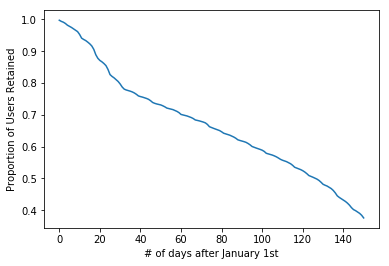

In [130]:
plt.plot(range(len(days)),retained)
plt.xlabel('# of days after January 1st'); plt.ylabel('Proportion of Users Retained')

In [131]:
#decide which algorithm to use
from sklearn.linear_model import LogisticRegression

In [132]:
lr = LogisticRegression()

In [133]:
from sklearn.preprocessing import LabelEncoder

In [138]:
mod = df.copy()

In [151]:
le = LabelEncoder()
led = LabelEncoder()
leed = LabelEncoder()

In [152]:
mod.loc[:,'phone'] = le.fit_transform(mod.phone)
mod.loc[:,'city'] = led.fit_transform(mod.city)
mod.loc[:,'retained'] = leed.fit_transform(mod.retained)
#mod.loc[:'signup_date'] = le.fit_transform(mod.signup_date)

Accuracy is a good measurement in this case since there is no special penalty for a false positive or false negative like in medical testing.

In [153]:
#encode text row and dates or drop them maybe
X = mod.drop(['retained','last_trip_date','signup_date'],axis=1)
y = mod.retained

In [171]:
from sklearn.model_selection import train_test_split, cross_val_score
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = .4)

In [157]:
lr.fit(Xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [177]:
lr.score(Xtest,ytest)

0.69530000000000003

In [178]:
cross_val_score(lr, X, y, cv=5)

array([ 0.69273073,  0.697     ,  0.6886    ,  0.6946    ,  0.7029703 ])

In [164]:
from sklearn.ensemble import RandomForestClassifier

In [231]:
rfc = RandomForestClassifier(n_estimators=100)

In [176]:
rfc.fit(Xtrain,ytrain)
rfc.score(Xtest,ytest)

0.74719999999999998

In [181]:
cross_val_score(rfc,X,y,cv=5)

array([ 0.74942506,  0.7437    ,  0.7459    ,  0.7486    ,  0.74627463])

In [183]:
#too slow dont use SVC
from sklearn.svm import SVC
svc = SVC()

In [184]:
svc.fit(Xtrain,ytrain)
svc.score(Xtest,ytest)

0.75390000000000001

In [186]:
from sklearn.neighbors import KNeighborsClassifier

In [187]:
KN = KNeighborsClassifier()

In [189]:
KN.fit(Xtrain,ytrain)
KN.score(Xtest,ytest)

0.74280000000000002

I've tested out several models without tuning and scores are similar for K-Neighbors, SVC, and Random Forests.  Logistic Regression scores worse but is easier to explain. I'm most comfortable with random forests and feel they are a good compromise between explainability and accuracy so that is the model I will work with.

In [190]:
from sklearn.model_selection import GridSearchCV

In [203]:
params = {'n_estimators':[10,100,1000],''}
gscv = GridSearchCV(rfc,params,cv=3,n_jobs=-1)

In [204]:
gscv.fit(Xtrain,ytrain)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

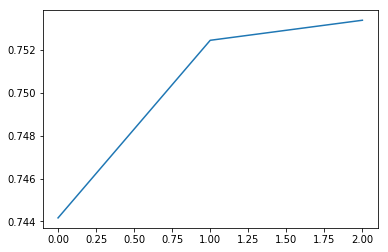

In [209]:
plt.plot(gscv.cv_results_['mean_test_score'])

In [242]:
params = {'max_features':[2,3,4],'max_depth':[12,13,14]}
gs = GridSearchCV(rfc,params,n_jobs=-1)

In [243]:
gs.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4], 'max_depth': [12, 13, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [244]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [245]:
frfc = RandomForestClassifier(n_estimators = 100, max_depth = 12, max_features = 3, n_jobs=-1)

In [246]:
frfc.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [247]:
frfc.score(Xtest,ytest)

0.78100000000000003

In [252]:
X.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'city', u'phone', u'surge_pct',
       u'trips_in_first_30_days', u'ultimate_black_user', u'weekday_pct'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

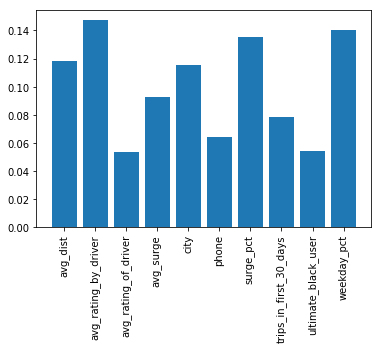

In [255]:
plt.bar(X.columns,frfc.feature_importances_)
plt.xticks(rotation = 90)

In [256]:
pd.crosstab(ytest,frfc.predict(Xtest))

col_0,0,1
retained,,
0,10726,1784
1,2596,4894


The tuned model has an accuracy of .78.  While not perfect it is decent compared to the binary classification null model accuracy of .5. The results are valid as I used train, test, split to create a holdout training set and also used cross validation.  Without these approaches the model wildly overfits, report an accuracy of about 96%.

The three most important features in the model are avg_rating_by_driver, surge percentage, and weekday percentage.  It makes sense that users who are highly rated by their drivers are more likely to be retained.  Higher rated users value Ultimate more highly and this results in them treating drivers better.  However, surge percentage and weekday percentage are far more actionable features.  It seems that users are more often retained if they use the service on weekdays, so incentivizing weekday trips is an approach I would recommend. It also seems that riders who frequently take trips in surging areas are more easily retained.  This indicates focus on marketing efforts in areas that frequently surge is a good approach